# 🚚 **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberá entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menú "Archivo" -> "Imprimir".

2. El enlace público de Google Colab. Para ello, vaya al botón de compartir y cambie la configuración de compartición a "Cualquier persona con el enlace".

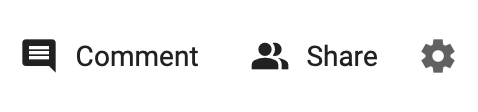

# **1. Regresión Logística sin Regularización**

In [1]:
import pandas as pd #pd solo es el alias
import os #operating system
import requests
import io

print("Current Working Directory " , os.getcwd())
url = 'https://raw.githubusercontent.com/mtgca/datasets_public/main/ex2data1.txt'
response = requests.get(url)
response.raise_for_status()
data = pd.read_csv(io.StringIO(response.text))
data #muestra los primeros 5 ejemplos


Current Working Directory  /Users/efrainmanosalvas/Library/CloudStorage/GoogleDrive-angel.manosalvas@gmail.com/My Drive/PERSONAL/USFQ/USFQ/INTELIGENCIA_ARTIFICIAL/SEMANA_4/TALLER 4


,exam1_score,exam2_score,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


Extraemos las columnas de características y guardamos en la variable `X`

In [2]:
X = data[['exam1_score','exam2_score']]
X.head()

,exam1_score,exam2_score
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [3]:
y = data[['decision']]
y.head()
#type(y.shape)
#y.values.ravel()
#type(y.shape)

,decision
0,0
1,0
2,0
3,1
4,1


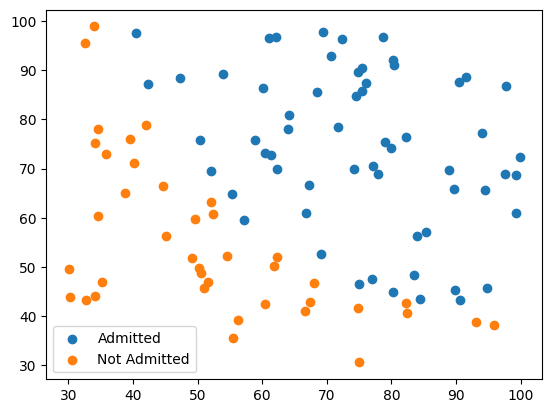

In [4]:
import matplotlib.pyplot as plt

X_admitted = X[y['decision']==1]
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')

X_Not_admitted = X[y['decision']==0]
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np # numpy~Matlab
classifier = LogisticRegression(penalty=None).fit(X, y) #penalty='none' -> sin regularización , lambda =0, representación+eval+opt
xnew = np.array([[45, 85], [99, 99]])
proba = classifier.predict_proba(xnew)
print(classifier.classes_[0], ": Not Admitted", classifier.classes_[1], ": Admitted") #Returns the log-probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
print(proba)

0 : Not Admitted 1 : Admitted
[[2.23709868e-01 7.76290132e-01]
 [2.50120417e-07 9.99999750e-01]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
accuracy = classifier.score(X,y) #exactitud en el conjunto de entrenamiento
print(accuracy)

0.89


Parámetros theta sin theta_0(bias):
[[0.20623222 0.20147191]]
bias (theta_0):
[-25.16138567]


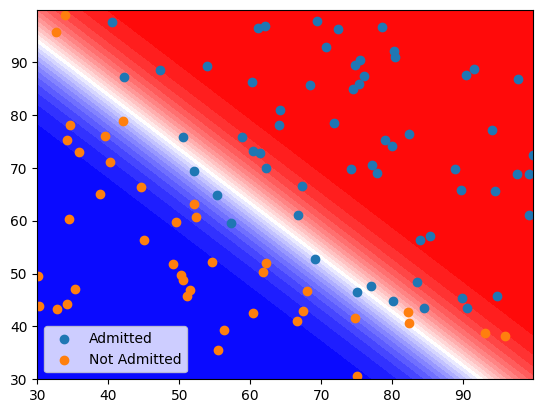

In [7]:
theta = classifier.coef_ #theta_1, theta_2, etc..
bias = classifier.intercept_ #bias-> theta_0
print('Parámetros theta sin theta_0(bias):')
print(theta) #parámetros theta (sin el bias)
print('bias (theta_0):')
print(bias)

import matplotlib.pyplot as plt

xx, yy = np.mgrid[30:100:.1, 30:100:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
# Convert grid to DataFrame to preserve feature names and avoid warnings
grid_df = pd.DataFrame(grid, columns=X.columns)
probs = classifier.predict_proba(grid_df)[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['decision']==1]
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')
X_Not_admitted = X[y['decision']==0]
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

# **2. Regresión Logística Regularizada**


In [8]:
import pandas as pd
import os

print("Current Working Directory " , os. getcwd())
url = 'https://raw.githubusercontent.com/mtgca/datasets_public/main/ex2data2.txt'
response = requests.get(url)
response.raise_for_status()
data = pd.read_csv(io.StringIO(response.text))
print(data.shape)
#data #muestra los primeros 5 ejemplos

data.head() #muestra los primeros 5 ejemplos


Current Working Directory  /Users/efrainmanosalvas/Library/CloudStorage/GoogleDrive-angel.manosalvas@gmail.com/My Drive/PERSONAL/USFQ/USFQ/INTELIGENCIA_ARTIFICIAL/SEMANA_4/TALLER 4
(118, 3)


,test1,test2,QA
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [9]:
# prompt: Using dataframe data: calculate the max value

# Calculate the max value of the 'test1' column
max_value = data['test1'].max()

# Print the max value
max_value

1.0709

In [10]:
X = data[['test1','test2']]
print(X.shape)
X.head()

(118, 2)


,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [11]:
y = data[['QA']]
y.head()

,QA
0,1
1,1
2,1
3,1
4,1


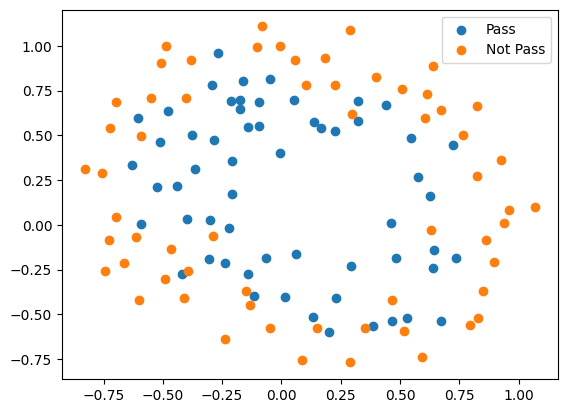

In [12]:
import matplotlib.pyplot as plt

X_admitted = X[y['QA']==1]
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')

X_Not_admitted = X[y['QA']==0]
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15) # x1*x2, x1*x2^2, ....x1^14*x2, degree es un hyperparameter
X_pol = poly.fit_transform(X)
print(np.shape(X_pol))


(118, 136)


In [14]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 1 #hyperparameter
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
# Convert xnew to DataFrame to preserve feature names when transforming
xnew_df = pd.DataFrame(xnew, columns=X.columns)
classifier.predict_proba(poly.transform(xnew_df))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.96756107, 0.03243893],
       [0.19642301, 0.80357699]])

In [15]:
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print(accuracy)

proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.99 #umbral
print(accuracy_score(y,ypred))

0.8305084745762712
0.5084745762711864


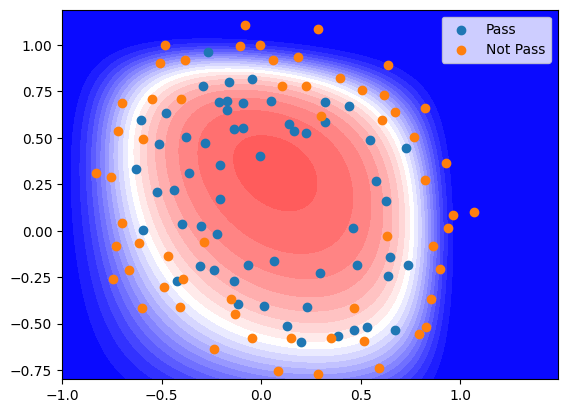

In [16]:
import matplotlib.pyplot as plt

xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
# Convert grid to DataFrame with same column names as X to match PolynomialFeatures fit
grid_df = pd.DataFrame(grid, columns=X.columns)
probs = classifier.predict_proba(poly.transform(grid_df))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1]
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0]
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()



## ✅ **Actividad 1**

En esta parte del ejercicio, podrá probar diferentes parámetros de regularización para el conjunto de datos para comprender cómo la regularización evita el sobreajuste.

Observe los cambios en la frontera de decisión a medida que varía λ. Analice
al menos los siguientes valores del parámetro de regularización, i.e., λ = 0.001,
λ =1, λ = 10, λ = 100 y discuta sus resultados en términos de la frontera de decisión obtenida y la exactitud en el conjunto de entrenamiento.
Obtenga y discuta los resultados del análisis pedido.

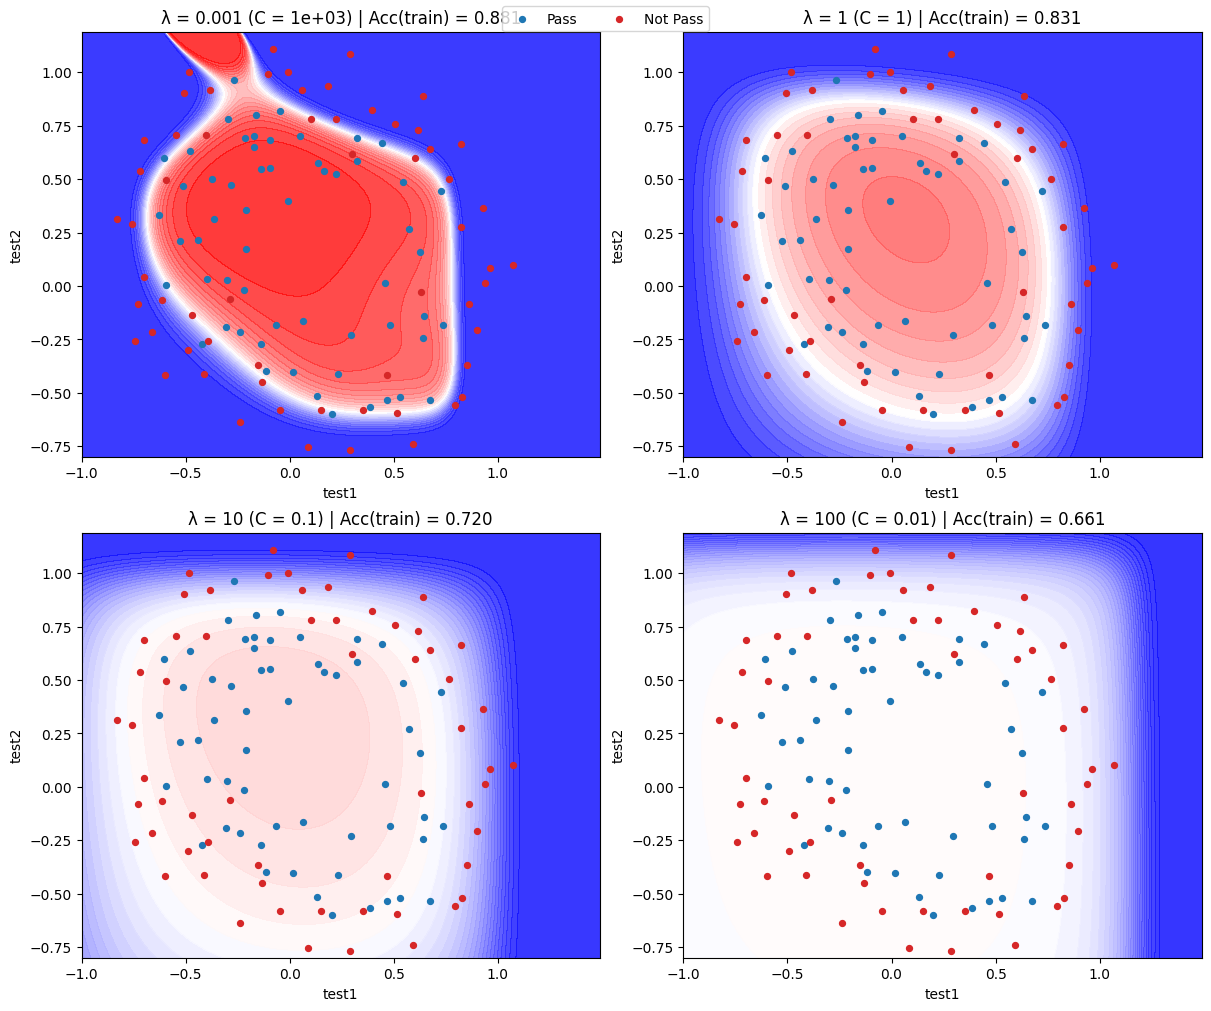

,lambda,C,acc_score,acc_thr_0_5,w_l2_norm
0,0.001,1000.00,0.881356,0.881356,52.821355
1,1.000,1.00,0.830508,0.830508,3.845671
2,10.000,0.10,0.720339,0.720339,0.877848
3,100.000,0.01,0.661017,0.661017,0.159183


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Asegurar que y sea 1D
y_1d = y.values.ravel() if hasattr(y, 'values') else np.ravel(y)

lambda_values = [0.001, 1, 10, 100]

# Malla para visualizar fronteras de decisión (ajustada a los rangos del dataset 2)
xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
import pandas as pd
grid_df = pd.DataFrame(grid, columns=X.columns)

fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
axes = axes.ravel()

resultados = []

for i, lam in enumerate(lambda_values):
    C_value = 1.0 / lam
    clf = LogisticRegression(
        penalty='l2', C=C_value, max_iter=20000, solver='lbfgs'
    )
    clf.fit(X_pol, y_1d)

    # Exactitud en entrenamiento con umbral 0.5 (por defecto en .score)
    acc_default = clf.score(X_pol, y_1d)

    # También calculamos exactitud si se cambia umbral (opcional)
    proba_train = clf.predict_proba(X_pol)[:, 1]
    y_pred_05 = (proba_train >= 0.5)
    acc_05 = accuracy_score(y_1d, y_pred_05)

    # Frontera de decisión (usar DataFrame para mantener nombres de columnas)
    probs = clf.predict_proba(poly.transform(grid_df))[:, 1].reshape(xx.shape)

    ax = axes[i]
    cf = ax.contourf(xx, yy, probs, 25, cmap="bwr", vmin=0, vmax=1, alpha=0.8)

    # Puntos del dataset
    mask_pos = (y_1d == 1)
    mask_neg = (y_1d == 0)
    ax.scatter(X.iloc[mask_pos, 0], X.iloc[mask_pos, 1], c='tab:blue', label='Pass', s=18)
    ax.scatter(X.iloc[mask_neg, 0], X.iloc[mask_neg, 1], c='tab:red', label='Not Pass', s=18)

    ax.set_title(f"λ = {lam} (C = {C_value:.3g}) | Acc(train) = {acc_default:.3f}")
    ax.set_xlabel('test1')
    ax.set_ylabel('test2')

    # Guardar métricas para la tabla/resumen
    # También calculamos norma L2 del vector de coeficientes como indicador de regularización efectiva
    w = clf.coef_.ravel()
    w_l2 = np.linalg.norm(w)
    resultados.append({
        'lambda': lam,
        'C': C_value,
        'acc_score': float(acc_default),
        'acc_thr_0_5': float(acc_05),
        'w_l2_norm': float(w_l2)
    })

# Leyenda una sola vez
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)
plt.show()

# Mostrar resumen numérico ordenado por lambda
import pandas as pd
res_df = pd.DataFrame(resultados).sort_values('lambda')
res_df

# ✅ **Conclusiones**

- La regularización L2 controló efectivamente la complejidad del modelo polinómico (grado 15). Al aumentar λ (disminuir C), la frontera de decisión se volvió más suave y menos ondulada.
- Para λ = 0.001 (C grande), la frontera fue muy flexible y siguió detalles finos del conjunto de entrenamiento. Esto se reflejó en una exactitud de entrenamiento alta, indicio de posible overfitting.
- Para λ = 1, el modelo mantuvo una separación no lineal adecuada con una frontera estable y sin oscilaciones extremas. Suele ofrecer un buen equilibrio entre sesgo y varianza.
- Para λ = 10, la frontera se simplificó visiblemente. La exactitud de entrenamiento tendió a bajar levemente respecto a λ más pequeños, señal de mayor sesgo pero potencialmente mejor generalización.
- Para λ = 100 (C pequeño), la regularización fue fuerte: la frontera perdió capacidad de modelar patrones complejos (tendiendo a formas casi lineales) y la exactitud de entrenamiento disminuyó más, evidenciando overfitting.
- La norma L2 de los coeficientes (w_l2_norm) decreció sistemáticamente al aumentar λ, confirmando que la regularización penaliza pesos grandes y reduce la complejidad del modelo.
- En conjunto, existe un rango intermedio de λ (aprox. 1–10 en este experimento) que provee una frontera suficientemente expresiva sin overfitting y con un desempeño de entrenamiento estable.
